![](https://media.tenor.com/2465uJ1MAsMAAAAC/asleep-class.gif)

In [ ]:
# cohort
    # group: time
    # oct cohort
    # jan cohort

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import datetime as dt

`import dataset`

In [9]:
df = pd.read_excel("../datasets/Online Retail - cohort.xlsx")
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# how each individual customer behaves over time
    # segmenting by month
    # how signed up when
        # how that evolves
            # march -> dec?
            # jan -> dec? 

In [11]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [10]:
df_1 = df.copy(frac=0.1)
df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#  Dropping Rows with No CustomerID

In [2]:
# online retail

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
df.dropna(subset=["CustomerID"], inplace=True)
df.shape

(406829, 8)

In [18]:
#df["CustomerID"].dropna(inplace=True)

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Indexing the Column By First Month of Visit

`when did each client buy for the first time?`

In [20]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
257350,559525,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,8,2011-07-10 10:30:00,0.42,16923.0,United Kingdom


In [23]:
# first InvoiceDate

In [28]:
df["cohort_month"] =  df.groupby("CustomerID")["InvoiceDate"].min() # [] -> series / column
 
# the first purchase they did

[Transform pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)

In [33]:
df["cohort_month"] =  df.groupby("CustomerID")["InvoiceDate"].transform("min") # [] -> series / column
df.sample()                                                   # lambda x: min(x)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month
402540,571502,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-10-17 15:18:00,2.1,14422.0,United Kingdom,2011-03-17 17:26:00


In [ ]:
# 406.829 rows, non repeated customers
    # 4372 customers

In [31]:
len(df["CustomerID"].unique())

4372

In [34]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-08-18 15:44:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-08-18 15:44:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-08-18 15:44:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-08-18 15:44:00


In [35]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month
264570,560104,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-07-14 18:56:00,1.45,17921.0,United Kingdom,2011-03-18 13:19:00


In [ ]:
# cohort month -> YYYY/MM/01 for every row of the same customer

In [39]:
date_info = df["cohort_month"].loc[264570] # Timestamp('2011-03-18 13:19:00')
date_info
# I dropped values -> index (iloc) will not correspond to the label it has

# Loc -> label
# iloc -> position (index)

Timestamp('2011-03-18 13:19:00')

In [41]:
date_info # YYYY/MM/01

Timestamp('2011-03-18 13:19:00')

In [43]:
date_info.month

3

In [44]:
date_info.year

2011

In [71]:
df["c_month"] = df["InvoiceDate"].apply(lambda x: x.month)

In [72]:
df["c_year"] = df["InvoiceDate"].apply(lambda x: x.year)

In [73]:
import datetime

In [68]:
def extract_date (date_type):
    return datetime.date(date_type.year, date_type.month, 1) # casting date with datetime library

In [70]:
extract_date (date_info)

datetime.date(2011, 3, 1)

In [64]:
df["cohort_month"] = df["cohort_month"].apply(extract_date) # YYYY/MM/01

In [74]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,c_month,c_year
106583,545334,22233,JIGSAW RABBIT AND BIRDHOUSE,3,2011-03-01 16:34:00,1.65,15750.0,United Kingdom,2010-12-01,3,2011
74865,542534,72741,GRAND CHOCOLATECANDLE,9,2011-01-28 13:27:00,1.45,13707.0,United Kingdom,2011-01-01,1,2011
411109,572193,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,144,2011-10-21 11:33:00,4.95,15061.0,United Kingdom,2010-12-01,10,2011
518970,580129,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-01 18:03:00,3.75,17426.0,United Kingdom,2011-03-01,12,2011
442636,574677,21479,WHITE SKULL HOT WATER BOTTLE,1,2011-11-06 12:32:00,4.25,16445.0,United Kingdom,2011-11-01,11,2011
425465,573324,22469,HEART OF WICKER SMALL,12,2011-10-30 10:56:00,1.65,16235.0,United Kingdom,2011-01-01,10,2011
19159,537842,84836,ZINC METAL HEART DECORATION,12,2010-12-08 15:12:00,1.25,13140.0,United Kingdom,2010-12-01,12,2010
77090,542708,22937,BAKING MOULD CHOCOLATE CUPCAKES,24,2011-01-31 13:07:00,2.55,17621.0,United Kingdom,2010-12-01,1,2011
430041,573579,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-10-31 14:19:00,0.95,15033.0,United Kingdom,2011-01-01,10,2011
316009,564742,22382,LUNCH BAG SPACEBOY DESIGN,2,2011-08-28 15:01:00,1.65,17346.0,United Kingdom,2010-12-01,8,2011


In [ ]:
# How far a given purchase is regarding the initital one

In [75]:
df["InvoiceDate_2"] = df["InvoiceDate"].apply(extract_date)

In [76]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,c_month,c_year,InvoiceDate_2
236372,557750,23205,CHARLOTTE BAG VINTAGE ALPHABET,10,2011-06-22 12:50:00,0.85,16841.0,United Kingdom,2011-02-01,6,2011,2011-06-01


In [79]:
df["months_advanced"] = df["InvoiceDate_2"] - df["cohort_month"]
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,c_month,c_year,InvoiceDate_2,months_advanced
148195,549188,16161P,WRAP ENGLISH ROSE,25,2011-04-07 10:10:00,0.42,13731.0,United Kingdom,2011-04-01,4,2011,2011-04-01,0:00:00


In [81]:
#year_difference = df["c_year"] - df["cohort_month"].year
#month_difference = df["c_month"] - df["cohort_month"].month

In [87]:
def extract_year (col1, col2):
    year_cohort = col1.year
    return col2-year_cohort

In [89]:
df["year_difference"] = df.apply(lambda row: extract_year (row["cohort_month"], row["c_year"]), axis=1)

In [92]:
def extract_month (col1, col2):
    year_cohort = col1.month
    return col2-year_cohort

In [95]:
df["month_difference"] = df.apply(lambda row: extract_month (row["cohort_month"], row["c_month"]), axis=1)

In [96]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,c_month,c_year,InvoiceDate_2,months_advanced,year_difference,month_difference
266488,560256,22673,FRENCH GARDEN SIGN BLUE METAL,4,2011-07-17 13:24:00,1.25,14462.0,United Kingdom,2011-01-01,7,2011,2011-07-01,"181 days, 0:00:00",0,6


In [97]:
df["cohort_index"] = df["year_difference"] * 12 + df["month_difference"] + 1

In [100]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,c_month,c_year,InvoiceDate_2,months_advanced,year_difference,month_difference,cohort_index
25808,538403,21810,CHRISTMAS HANGING STAR WITH BELL,10,2010-12-12 11:46:00,1.25,17211.0,United Kingdom,2010-12-01,12,2010,2010-12-01,0:00:00,0,0,1


In [101]:
df.drop(columns = ["c_month", "c_year", "InvoiceDate_2", "months_advanced"], inplace=True)

In [105]:
df.sample() # +1 including the month of singing up
# if we don't include the +1 -> X months after signing up

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,year_difference,month_difference,cohort_index
135978,547921,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-03-28 13:28:00,2.95,14766.0,United Kingdom,2010-12-01,1,-9,4


In [ ]:
# Marta
# df.years_diff = df.c_year - df["cohort_month"].apply(lambda x: x.year)

In [ ]:
# cohort_month -> 2011-02-0

df["cohort_index"] = year_difference * 12 + month_difference + 1

# jan: sign up
# march: buy

# year: 0 * 12 = 0
# month: 2

year_difference * 12 + month_difference + 1 # -> 3. (JAN SIGN UP), MARCH they bought

In [106]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,year_difference,month_difference,cohort_index
52645,540809,22586,FELTCRAFT HAIRBAND PINK AND BLUE,12,2011-01-11 12:37:00,0.85,18095.0,United Kingdom,2011-01-01,0,0,1


# Grouping Data With CustomerIDs

`WHEN did each client continue buying?: how many months from the first purchase is each row?`

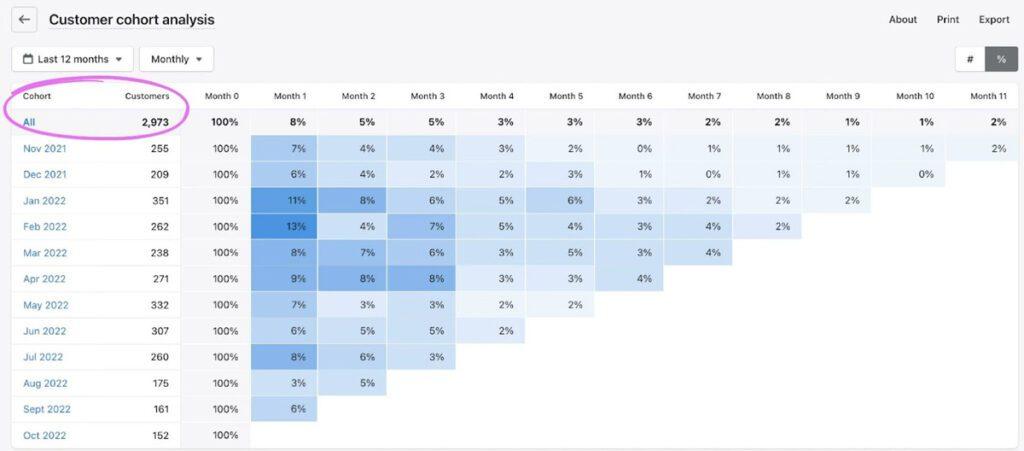

In [107]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,year_difference,month_difference,cohort_index
98883,544685,22045,SPACEBOY GIFT WRAP,25,2011-02-22 17:13:00,0.42,13285.0,United Kingdom,2011-02-01,0,0,1


In [110]:
cohort_data = df.groupby(["cohort_month", "cohort_index"])["CustomerID"].apply(pd.Series.nunique).reset_index()
cohort_data

,cohort_month,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [121]:

#cohort_table.index = pd.to_datetime(cohort_table.index).strftime('%B %Y')

[pandas strftime](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html)

In [126]:
cohort_table = cohort_data.pivot(index="cohort_month", columns = ["cohort_index"])
cohort_table.index = pd.to_datetime(cohort_table.index).strftime('%B %Y')
cohort_table

CustomerID                                                    
cohort_index           1      2      3      4      5      6      7      8    
cohort_month                                                                 
December 2010       948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0  \
January 2011        421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0   
February 2011       380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   
March 2011          440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0   
April 2011          299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   
May 2011            279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0   
June 2011           235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN   
July 2011           191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN   
August 2011         167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN   
September 2011      298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN   
October 2011        352.0   93.0   46.0    NaN    NaN    NaN    NaN    NaN   
November 2011       321.0   43.0    NaN    NaN    NaN    NaN    NaN    NaN   
December 2011        41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                   
cohort_index       9      10     11     12     13  
cohort_month                                       
December 2010   336.0  374.0  354.0  474.0  260.0  
January 2011    131.0  146.0  155.0   63.0    NaN  
February 2011    98.0  119.0   35.0    NaN    NaN  
March 2011      127.0   39.0    NaN    NaN    NaN  
April 2011       25.0    NaN    NaN    NaN    NaN  
May 2011          NaN    NaN    NaN    NaN    NaN  
June 2011         NaN    NaN    NaN    NaN    NaN  
July 2011         NaN    NaN    NaN    NaN    NaN  
August 2011       NaN    NaN    NaN    NaN    NaN  
September 2011    NaN    NaN    NaN    NaN    NaN  
October 2011      NaN    NaN    NaN    NaN    NaN  
November 2011     NaN    NaN    NaN    NaN    NaN  
December 2011     NaN    NaN    NaN    NaN    NaN

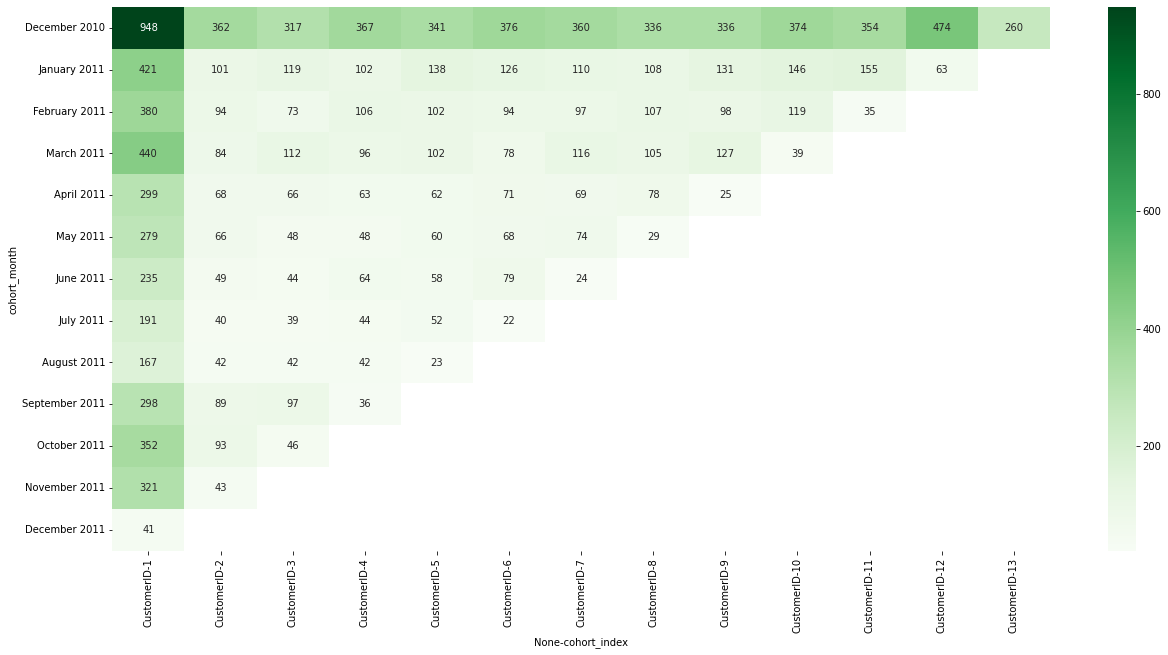

In [133]:
plt.figure(figsize=(21, 10))
sns.heatmap(cohort_table, annbot=True, fmt= "g", cmap="Greens");

In [139]:
cohort_table.iloc[:, 0] # all the rows in column 0 (the firt one)

cohort_month
December 2010     948.0
January 2011      421.0
February 2011     380.0
March 2011        440.0
April 2011        299.0
May 2011          279.0
June 2011         235.0
July 2011         191.0
August 2011       167.0
September 2011    298.0
October 2011      352.0
November 2011     321.0
December 2011      41.0
Name: (CustomerID, 1), dtype: float64

In [151]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:, 0], axis=0)
new_cohort_table

CustomerID                                                     
cohort_index           1         2         3         4         5         6    
cohort_month                                                                  
December 2010         1.0  0.381857  0.334388  0.387131  0.359705  0.396624  \
January 2011          1.0  0.239905  0.282660  0.242280  0.327791  0.299287   
February 2011         1.0  0.247368  0.192105  0.278947  0.268421  0.247368   
March 2011            1.0  0.190909  0.254545  0.218182  0.231818  0.177273   
April 2011            1.0  0.227425  0.220736  0.210702  0.207358  0.237458   
May 2011              1.0  0.236559  0.172043  0.172043  0.215054  0.243728   
June 2011             1.0  0.208511  0.187234  0.272340  0.246809  0.336170   
July 2011             1.0  0.209424  0.204188  0.230366  0.272251  0.115183   
August 2011           1.0  0.251497  0.251497  0.251497  0.137725       NaN   
September 2011        1.0  0.298658  0.325503  0.120805       NaN       NaN   
October 2011          1.0  0.264205  0.130682       NaN       NaN       NaN   
November 2011         1.0  0.133956       NaN       NaN       NaN       NaN   
December 2011         1.0       NaN       NaN       NaN       NaN       NaN   

                                                                             
cohort_index          7         8         9         10        11        12   
cohort_month                                                                 
December 2010   0.379747  0.354430  0.354430  0.394515  0.373418  0.500000  \
January 2011    0.261283  0.256532  0.311164  0.346793  0.368171  0.149644   
February 2011   0.255263  0.281579  0.257895  0.313158  0.092105       NaN   
March 2011      0.263636  0.238636  0.288636  0.088636       NaN       NaN   
April 2011      0.230769  0.260870  0.083612       NaN       NaN       NaN   
May 2011        0.265233  0.103943       NaN       NaN       NaN       NaN   
June 2011       0.102128       NaN       NaN       NaN       NaN       NaN   
July 2011            NaN       NaN       NaN       NaN       NaN       NaN   
August 2011          NaN       NaN       NaN       NaN       NaN       NaN   
September 2011       NaN       NaN       NaN       NaN       NaN       NaN   
October 2011         NaN       NaN       NaN       NaN       NaN       NaN   
November 2011        NaN       NaN       NaN       NaN       NaN       NaN   
December 2011        NaN       NaN       NaN       NaN       NaN       NaN   

                          
cohort_index          13  
cohort_month              
December 2010   0.274262  
January 2011         NaN  
February 2011        NaN  
March 2011           NaN  
April 2011           NaN  
May 2011             NaN  
June 2011            NaN  
July 2011            NaN  
August 2011          NaN  
September 2011       NaN  
October 2011         NaN  
November 2011        NaN  
December 2011        NaN

In [152]:
#new_cohort_table = new_cohort_table * 100
#new_cohort_table

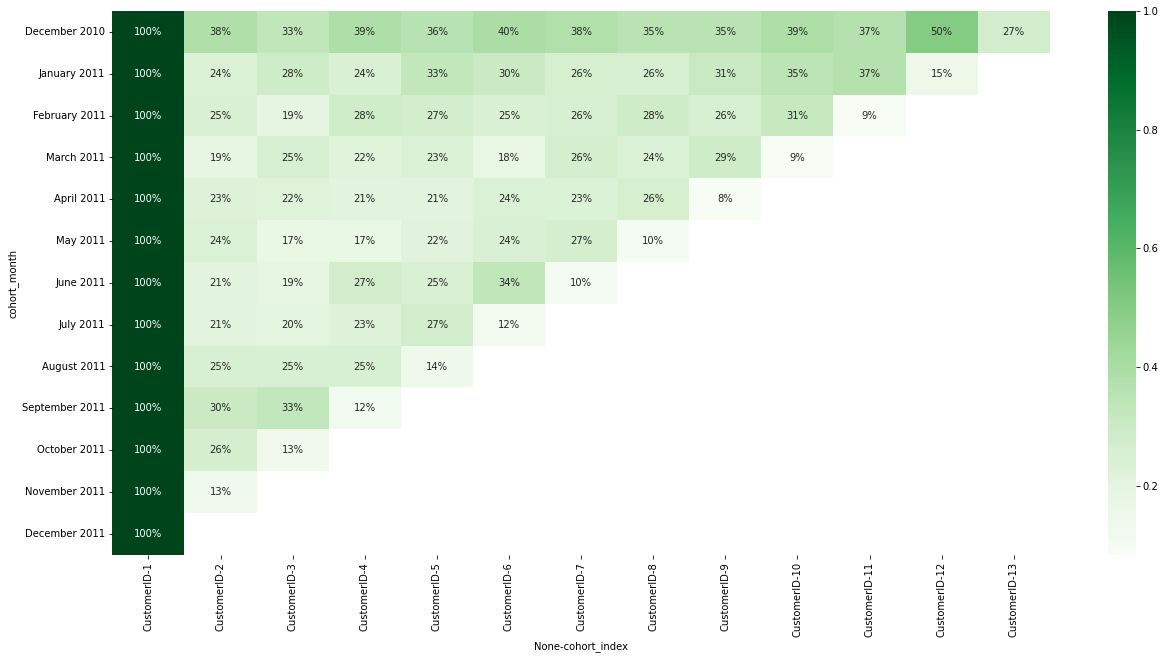

In [153]:
plt.figure(figsize=(21, 10))
sns.heatmap(new_cohort_table, annot=True, fmt= ".0%", cmap="Greens");

In [ ]:
# december cohort seems to be the most repeated buyers
# december 2011 we dont have the full info
# november 2011 -> dec cohort bought again a lot

In [ ]:
# promotions, holidays

In [ ]:
# 1. Rows (COHORT, sideways): cohort itself
# 2. Columns (ALL COHORTS, same time, up-down): across different cohorts
# 3. Diagonal (MONTHS): focus on the months

# Creating a Pivot Table

# Creating the Heatmaps


`total amount`

`percentages`